In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve,  precision_recall_curve, auc, roc_curve

import pickle



import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



In [2]:
df =pd.read_excel("../data/a1_Dataset_10Percent.xlsx")


In [3]:
df.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [4]:
df.shape

(22223, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [6]:
#check null values
df.isna().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

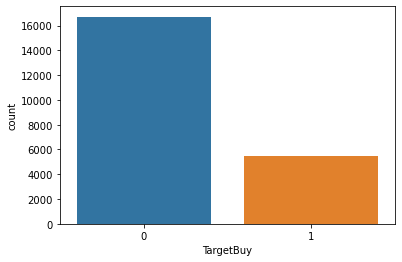

In [26]:
sns.countplot(df.TargetBuy);

## Notes:
- ID column not needed for analysis.
- Erroneous data types.
- Null values.

In [7]:
# make copy of the data
dfc = df.copy()

### Drop ID column:

In [8]:
dfc = dfc.drop(columns=['ID'])
#check
dfc.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


### Null Values:
- for categorical features we fill with the mode.
- for numerical features we fill with the mean.

In [10]:
dfc['DemAffl']=dfc['DemAffl'].fillna(dfc['DemAffl'].mode()[0])
dfc['DemAge']=dfc['DemAge'].fillna(dfc['DemAge'].mode()[0])
dfc['DemClusterGroup']=dfc['DemClusterGroup'].fillna(dfc['DemClusterGroup'].mode()[0])
dfc['DemGender']=dfc['DemGender'].fillna(dfc['DemGender'].mode()[0])
dfc['DemReg']=dfc['DemReg'].fillna(dfc['DemReg'].mode()[0])
dfc['DemTVReg']=dfc['DemTVReg'].fillna(dfc['DemTVReg'].mode()[0])
dfc['LoyalTime']=dfc['LoyalTime'].fillna(dfc['LoyalTime'].mean())

In [11]:
#check for nulls:
dfc.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

### Fix Data Types: (Encoding)

In [14]:
number = LabelEncoder()

dfc['DemClusterGroup'] = number.fit_transform(dfc['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dfc['DemGender'] = number.fit_transform(dfc['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dfc['DemReg'] = number.fit_transform(dfc['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dfc['DemTVReg'] = number.fit_transform(dfc['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dfc['LoyalClass'] = number.fit_transform(dfc['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


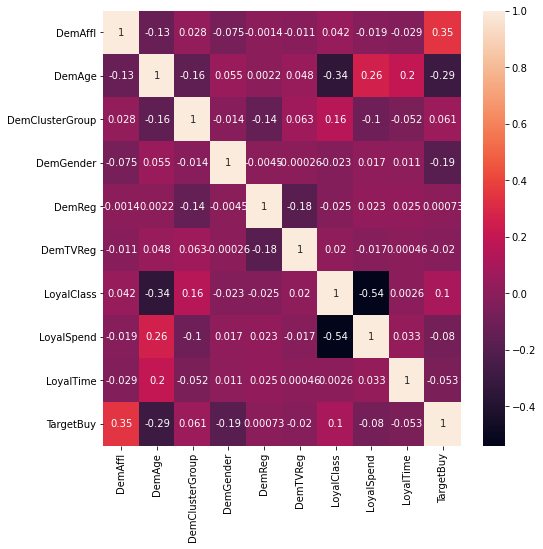

In [20]:
plt.figure(figsize= (8, 8))
sns.heatmap(dfc.corr(), annot= True);

## Split Data:

In [21]:
X = dfc.drop(columns=['TargetBuy'])
y = dfc['TargetBuy']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling:

### Logistic Regression:

In [23]:
clf =  LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.8056242969628796


In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3879
           1       0.36      0.69      0.47       566

    accuracy                           0.81      4445
   macro avg       0.65      0.76      0.68      4445
weighted avg       0.87      0.81      0.83      4445



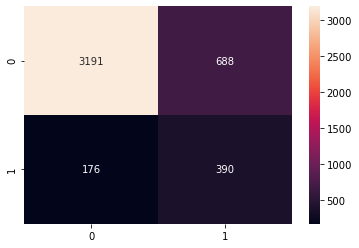

In [30]:
sns.heatmap(cm, annot= True, fmt = 'd');

## K-Nearest Neighbours:

In [35]:
error_rate = []
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

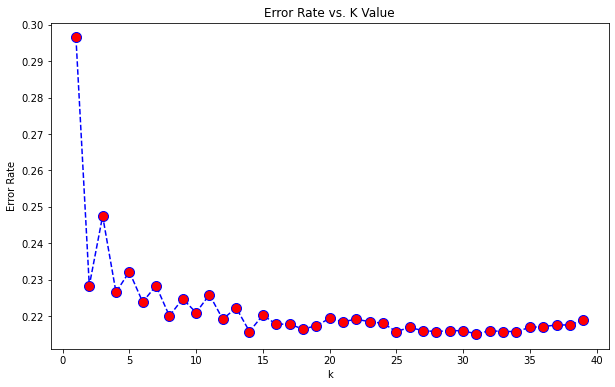

In [36]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', 
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('k') 
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [49]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      3963
           1       0.27      0.60      0.37       482

    accuracy                           0.78      4445
   macro avg       0.61      0.70      0.62      4445
weighted avg       0.87      0.78      0.81      4445



### Gradient Boosting:

In [67]:
g_boost = GradientBoostingClassifier(n_estimators=300, learning_rate=.01, max_depth=2, random_state=0)
g_boost.fit(X_train, y_train)
g_boost_pred = g_boost.predict(X_test)

In [76]:
g_boost_prob = g_boost.predict_proba(X_test)[:, 1]
g_boost_prob

array([0.12894949, 0.20400563, 0.44613546, ..., 0.12894949, 0.09788634,
       0.11821056])

In [68]:
print(classification_report(y_test, g_boost_pred))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3367
           1       0.72      0.38      0.50      1078

    accuracy                           0.81      4445
   macro avg       0.77      0.67      0.69      4445
weighted avg       0.80      0.81      0.79      4445



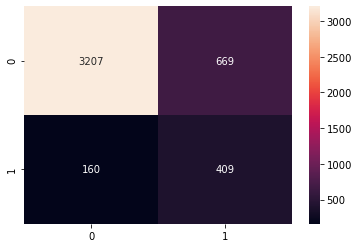

In [69]:
cm = confusion_matrix(g_boost_pred, y_test)
sns.heatmap(cm, annot= True, fmt = 'd');

## Evaluation:

- We can see that gradient boosting achieves higher precision, as we care more for correctly predicting the targeted audience for our campaign.

## Saving Model:

In [73]:
with open('../models/gradientboost.pkl', 'wb') as f:
    pickle.dump(g_boost, f)

## Saving Predictions:

In [89]:
df_prediction_prob = pd.DataFrame(g_boost_prob, columns = ['prob_1'])
df_test_dataset = pd.DataFrame(y_test.values,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test.values)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)

dfx.to_excel("../data/ModelOutput_10Percent.xlsx")

dfx.head()

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_1
0,10.0,58.0,3.0,1.0,3.0,8.0,0.0,12632.66,4.0,0,0.128949
1,10.0,51.0,2.0,0.0,3.0,8.0,0.0,6000.00,6.0,0,0.204006
2,16.0,65.0,1.0,0.0,2.0,6.0,0.0,6053.35,7.0,0,0.446135
3,5.0,60.0,3.0,0.0,3.0,3.0,2.0,5000.00,1.0,0,0.118211
4,9.0,52.0,3.0,0.0,0.0,4.0,2.0,3500.00,6.0,0,0.184018
